1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build regression model using variables that were narrowed down in step 1
5. Measure the accuracy Of the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("D:\\Data science\\py\ML\\7_logistic_reg\\Exercise\\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.promotion_last_5years.unique()

array([0, 1], dtype=int64)

<AxesSubplot:title={'center':'Employee Retention on satisfaction level'}, xlabel='satisfaction_level', ylabel='Number of Employees who left the work'>

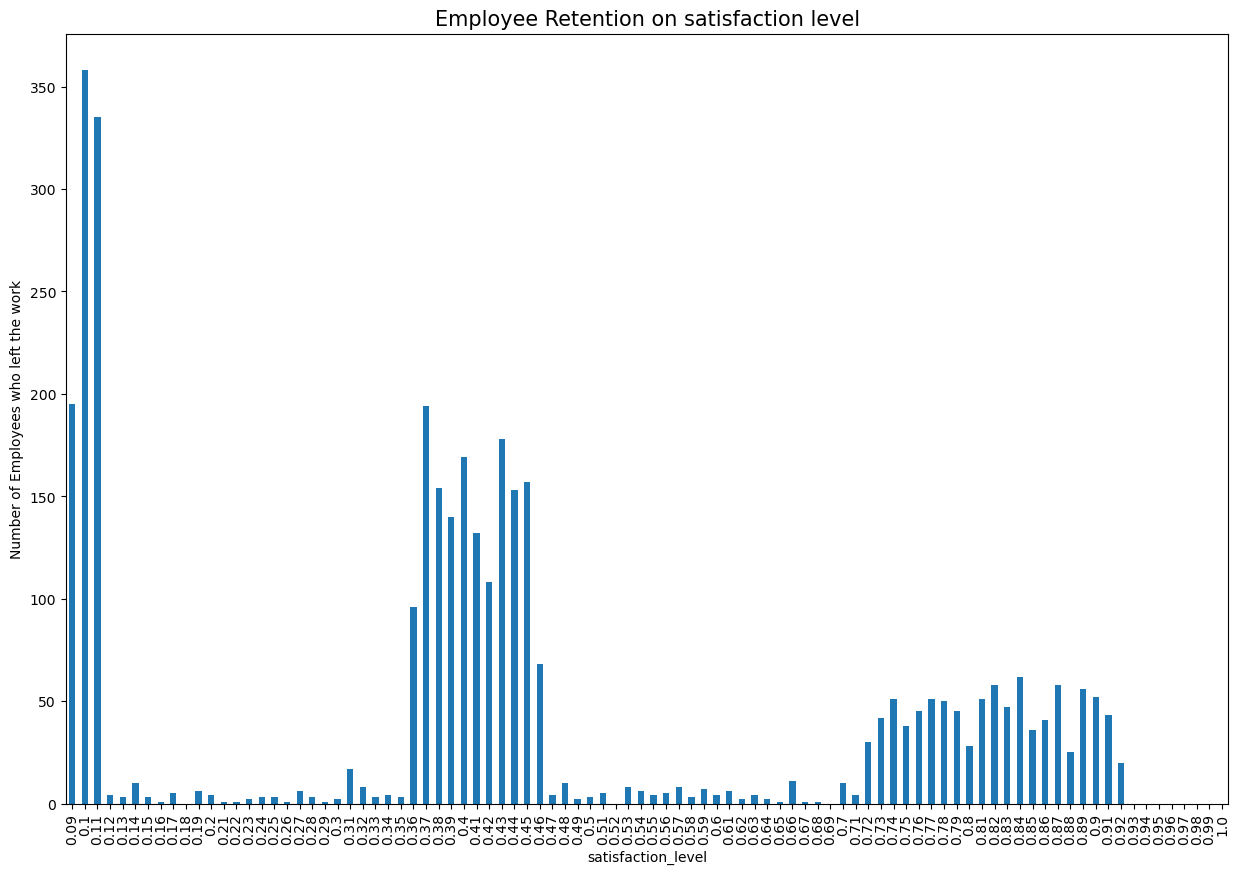

In [56]:
plt.figure(figsize=(15,10))
plt.ylabel("Number of Employees who left the work")
plt.title("Employee Retention on satisfaction level",fontsize=15)
df.groupby(['satisfaction_level'])['left'].sum().plot.bar()

<AxesSubplot:title={'center':'Employee Retention of various Department'}, xlabel='salary', ylabel='Number of Employees who left the work'>

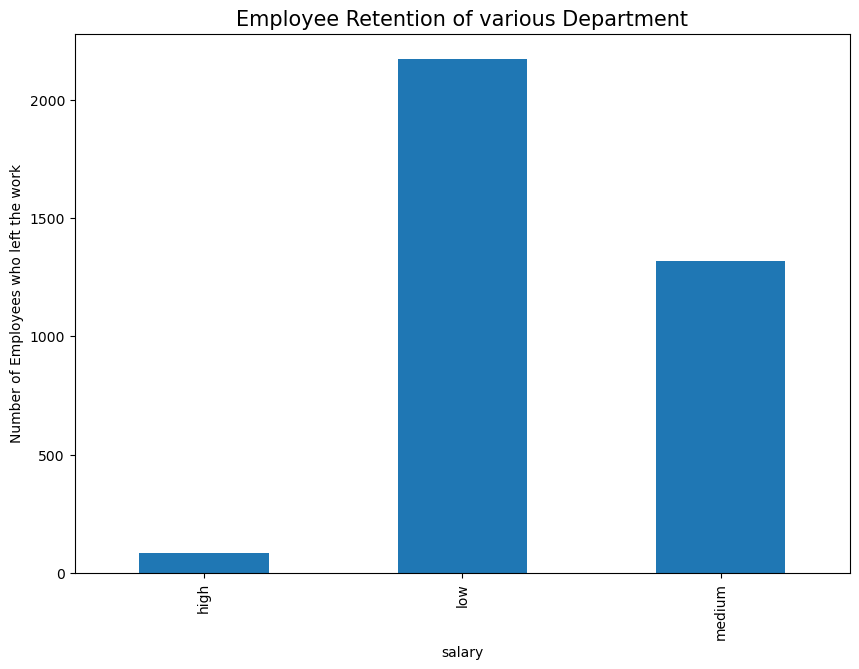

In [55]:
plt.figure(figsize=(10,7))
plt.ylabel("Number of Employees who left the work")
plt.title("Employee Retention of various Department",fontsize=15)
df.groupby(['salary'])['left'].sum().plot.bar()

<AxesSubplot:title={'center':'Employee Retention of various Department'}, xlabel='Department', ylabel='Number of Employees who left the work'>

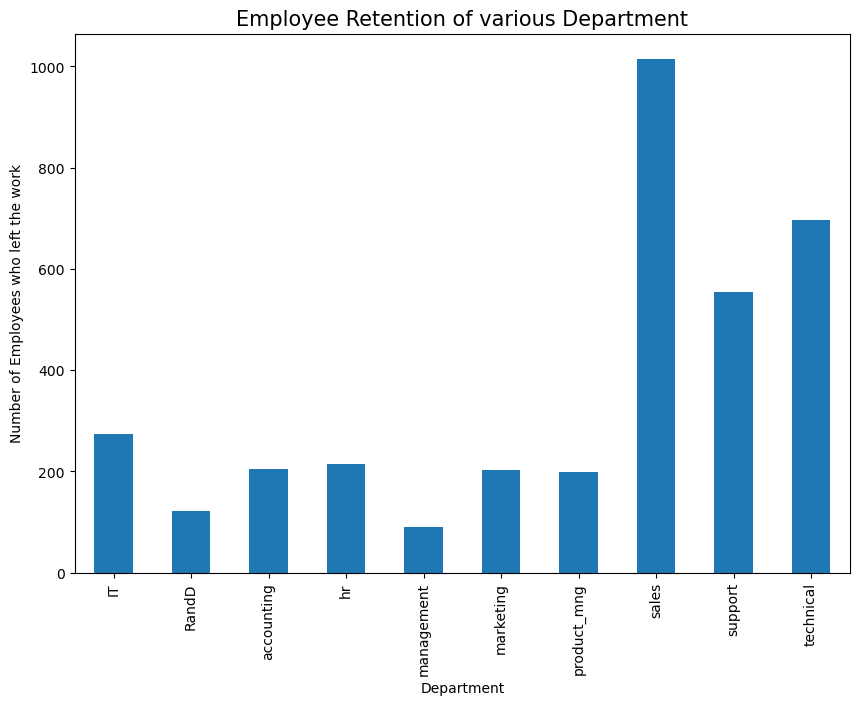

In [57]:
plt.figure(figsize=(10,7))
plt.ylabel("Number of Employees who left the work")
plt.title("Employee Retention of various Department",fontsize=15)
df.groupby(['Department'])['left'].sum().plot.bar()

<AxesSubplot:title={'center':'Employee Retention on project'}, xlabel='number_project', ylabel='Number of Employees who left the work'>

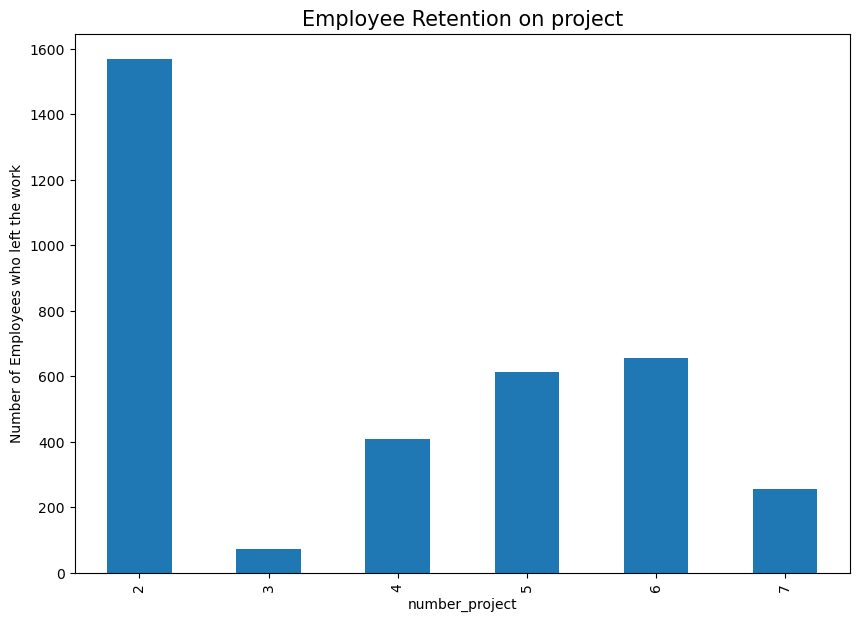

In [59]:
plt.figure(figsize=(10,7))
plt.ylabel("Number of Employees who left the work")
plt.title("Employee Retention on project",fontsize=15)
df.groupby(['number_project'])['left'].sum().plot.bar()

<AxesSubplot:title={'center':'Employee Retention on promotion last 5years'}, xlabel='promotion_last_5years', ylabel='Number of Employees who left the work'>

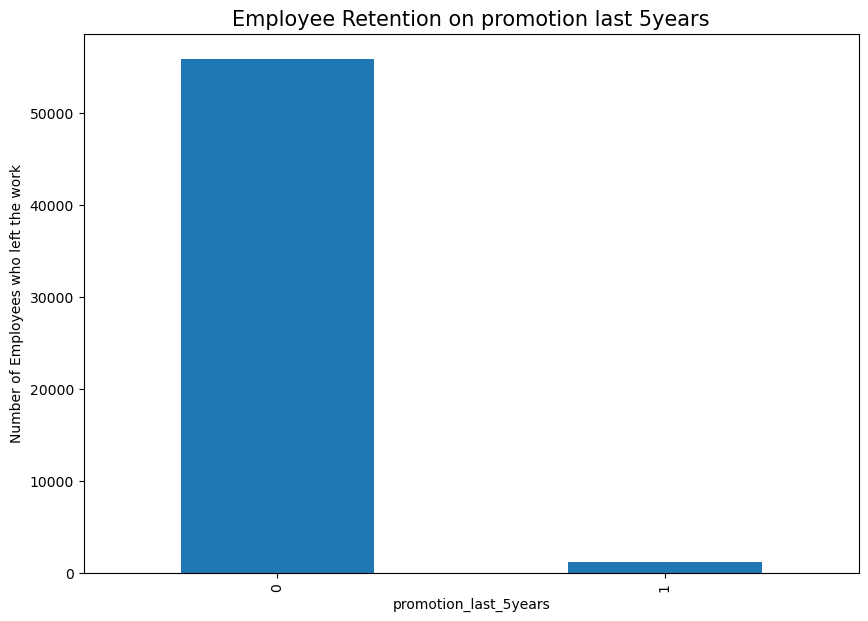

In [60]:
plt.figure(figsize=(10,7))
plt.ylabel("Number of Employees who left the work")
plt.title("Employee Retention on promotion last 5years",fontsize=15)
df.groupby(['promotion_last_5years'])['number_project'].sum().plot.bar()

<AxesSubplot:title={'center':'Employee Retention on time spend in company'}, xlabel='time_spend_company', ylabel='Number of Employees who left the work'>

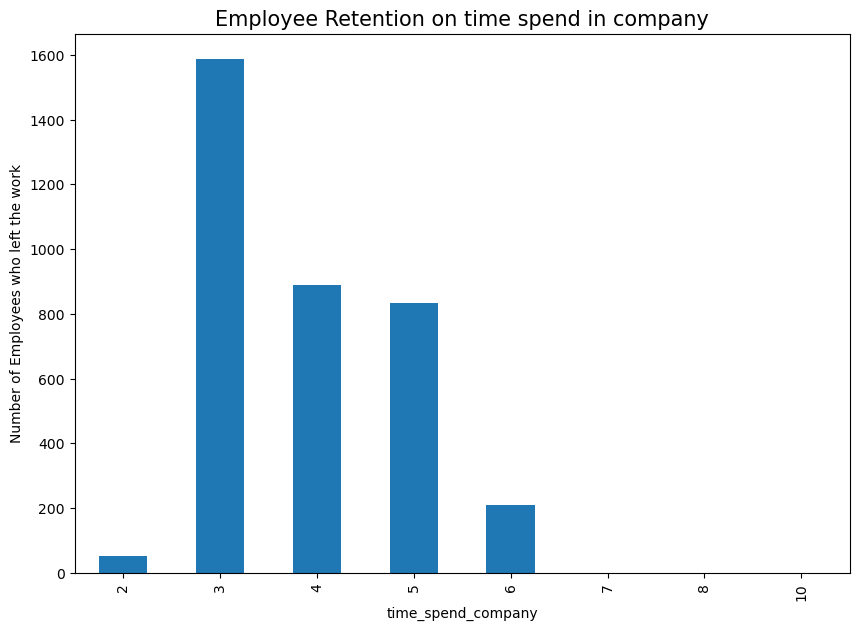

In [62]:
plt.figure(figsize=(10,7))
plt.ylabel("Number of Employees who left the work")
plt.title("Employee Retention on time spend in company",fontsize=15)
df.groupby(['time_spend_company'])['left'].sum().plot.bar()

<AxesSubplot:title={'center':'Employee Retention on work accident'}, xlabel='Work_accident', ylabel='Number of Employees who left the work'>

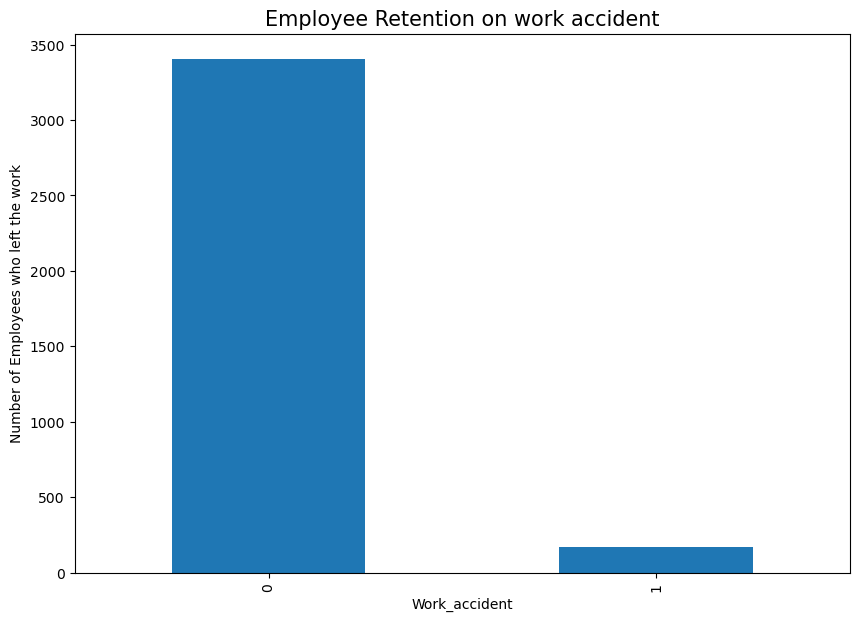

In [63]:
plt.figure(figsize=(10,7))
plt.ylabel("Number of Employees who left the work")
plt.title("Employee Retention on work accident",fontsize=15)
df.groupby(['Work_accident'])['left'].sum().plot.bar()

In [26]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [29]:
dummy_value=pd.get_dummies(df,columns=['Department','salary'])
dummy_value

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [41]:
#dependent variable if left
#independ all of this variable
x=dummy_value.drop('left',axis='columns')
y=dummy_value.left
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
6578,0.83,0.62,4,242,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
11524,0.81,0.47,4,153,7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
10908,0.47,0.46,2,152,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9732,0.92,0.88,4,111,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6735,0.25,0.59,4,166,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101,0.64,0.94,3,221,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3290,0.58,0.75,4,233,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6945,0.52,0.58,3,203,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4818,0.50,0.43,3,184,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [44]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [45]:
reg.fit(x,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
reg.score(x,y)

0.7893859590639376

reg.predict(x_test)

reg.predict([[0.90,0.42,6,252,4,0,0,1,0,0,0,0,0,0,0,0,0,0,10]])

In [50]:
reg.predict([[0.90,0.42,6,252,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)